In [1]:
#Import libraries and load CSV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/home/siddhant/Stout-Case-Study/CaseStudy1/loans_full_schema.csv')

data.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [2]:
#Number of rows
len(data)

10000

In [4]:
#Getting data statistics
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


In [6]:
#Finding duplicate values
data[data.duplicated()].shape

(0, 55)

No duplicate entries found in the dataset

In [7]:
#Loan Status and its types
data['loan_status'].value_counts()

Current               9375
Fully Paid             447
In Grace Period         67
Late (31-120 days)      66
Late (16-30 days)       38
Charged Off              7
Name: loan_status, dtype: int64

In [8]:
#We will drop rows other than that Fully paid and Charged Off
data = data[(data['loan_status'] == 'Fully Paid') | (data['loan_status'] == 'Charged Off')]

In [9]:
#Checking number of rows after dropping non important rows
len(data)

454

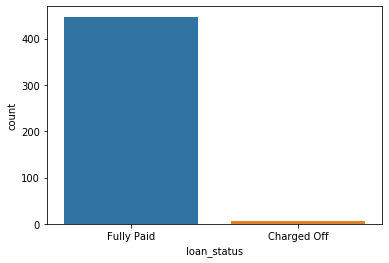

In [10]:
#Check loan status decomposition as fully paid and charged off
sns.countplot(x=data['loan_status'], data = data)

We can infer here that the data is imbalanced.

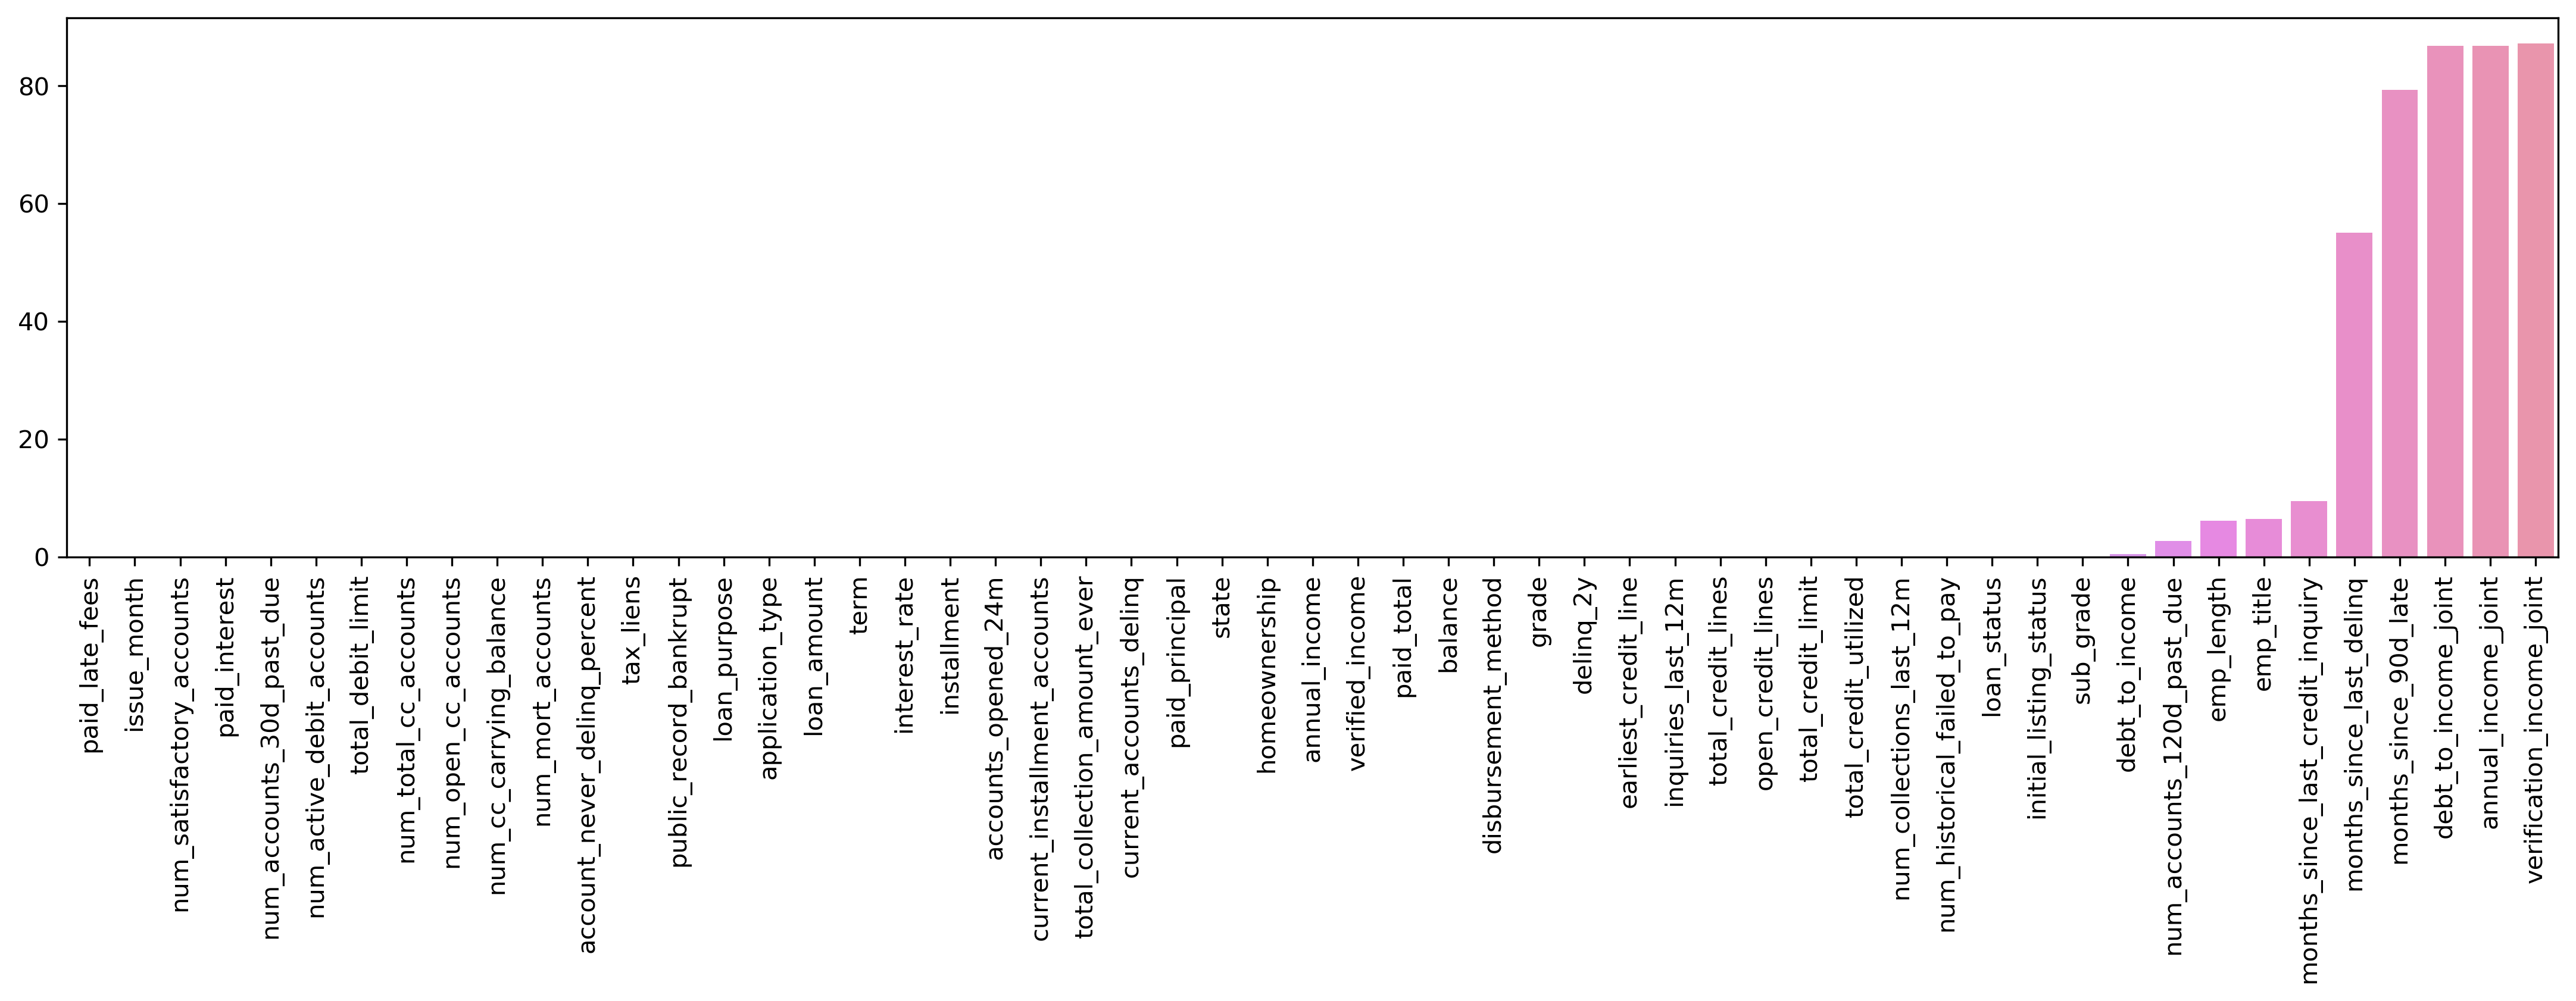

In [11]:
((data.isnull().sum()/len(data))*100).sort_values(ascending=False)
plt.figure(figsize=(18,4),dpi=300) # make image larger and clearer
# y contains the % of missing values od each column and x is the index of the series in above cell
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index) 
plt.xticks(rotation=90); # to rotate x-axis labels from horizontal to vertical

We can observe that these are the variables with majority of the values as NULL out fo 10000 rows-
1. annual_income_joint (8505)
2. verification_income_joint (8545)
3. debt_to_income_joint (8505)
4. months_since_last_delinq (5658)
5. months_since_90d_late (7715)

In [12]:
keepData = data.columns[((data.isnull().sum()/len(data))*100 < 50)].to_list()
#list of columns to be kept
keepData

['emp_title',
 'emp_length',
 'state',
 'homeownership',
 'annual_income',
 'verified_income',
 'debt_to_income',
 'delinq_2y',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_lines',
 'open_credit_lines',
 'total_credit_limit',
 'total_credit_utilized',
 'num_collections_last_12m',
 'num_historical_failed_to_pay',
 'current_accounts_delinq',
 'total_collection_amount_ever',
 'current_installment_accounts',
 'accounts_opened_24m',
 'months_since_last_credit_inquiry',
 'num_satisfactory_accounts',
 'num_accounts_120d_past_due',
 'num_accounts_30d_past_due',
 'num_active_debit_accounts',
 'total_debit_limit',
 'num_total_cc_accounts',
 'num_open_cc_accounts',
 'num_cc_carrying_balance',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'tax_liens',
 'public_record_bankrupt',
 'loan_purpose',
 'application_type',
 'loan_amount',
 'term',
 'interest_rate',
 'installment',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_

In [13]:
len(keepData)

50

In [15]:
#Dropping features with 50% or more missing values
data = data[keepData]
data.shape

(454, 50)

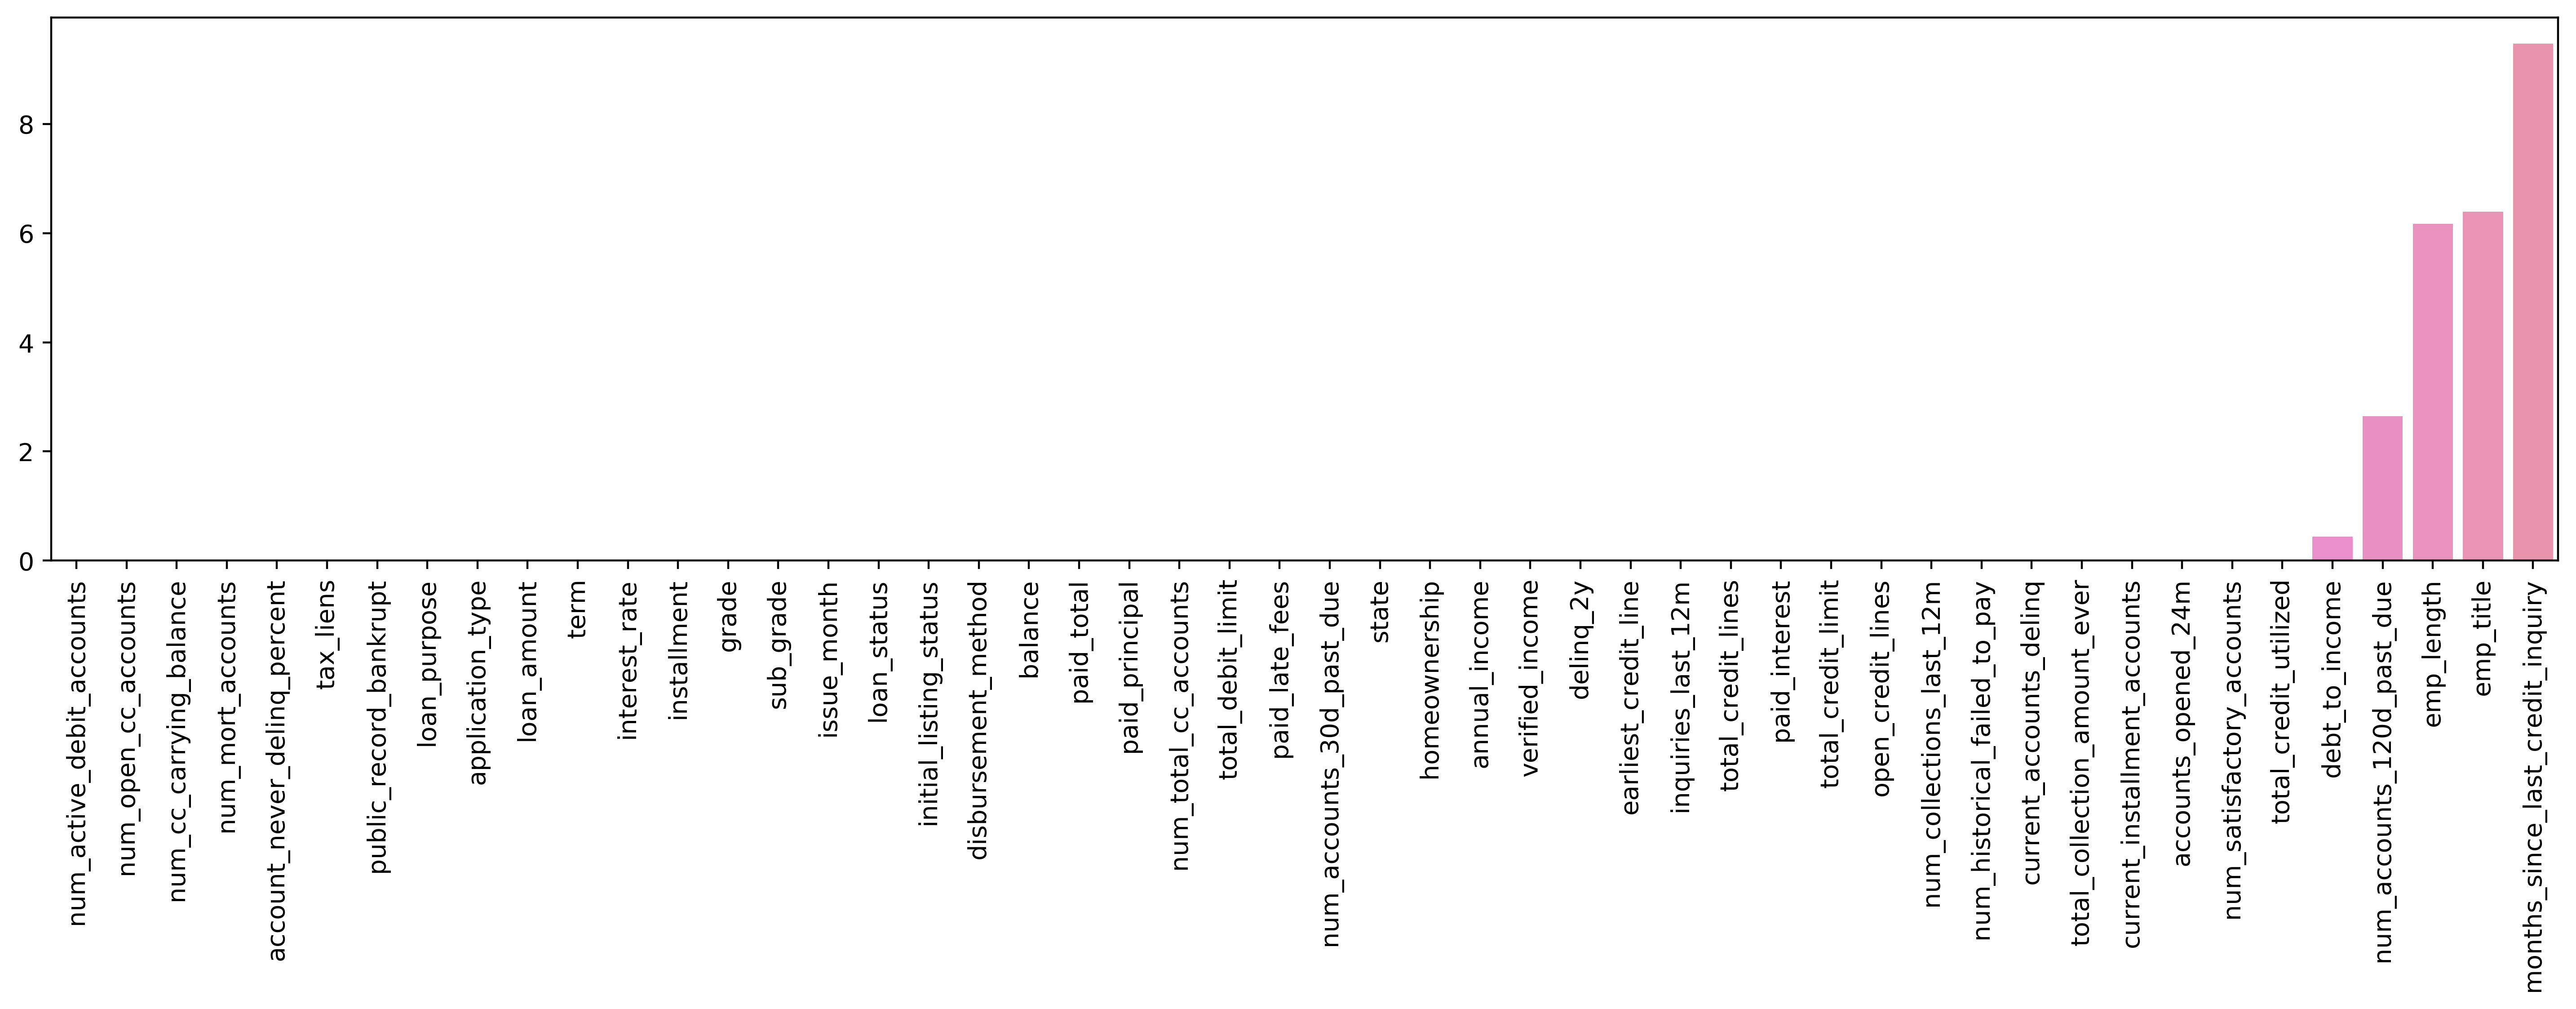

In [16]:
plt.figure(figsize=(18,4),dpi=400)
sns.barplot(y=((data.isnull().sum()/len(data))*100).sort_values(), x=((data.isnull().sum()/len(data))*100).sort_values().index)
plt.xticks(rotation=90);

In [19]:
#Important feature to be considered for further analysis
final_features = ['state', 'annual_income', 'earliest_credit_line', 'emp_length', 'emp_title', 'grade', 'homeownership', 'application_type',
                    'initial_listing_status', 'interest_rate', 'loan_amount', 'num_active_debit_accounts', 'loan_status', 'num_mort_accounts', 'balance', 'num_open_cc_accounts', 'public_record_bankrupt', 
                    'loan_purpose', 'sub_grade', 'term', 'verified_income']
len(final_features)

21

In [20]:
data = data[final_features]
data.shape

(454, 21)

In [22]:
data.dtypes.value_counts()

object     10
int64       7
float64     4
dtype: int64

Therefore, there are total 10 categorical variables

In [24]:
#The dependant variable
data['interest_rate']

18      26.77
19      15.05
34       9.93
35       6.08
107     14.08
        ...  
9777    12.62
9852    10.42
9919     6.72
9927    10.90
9971     7.96
Name: interest_rate, Length: 454, dtype: float64

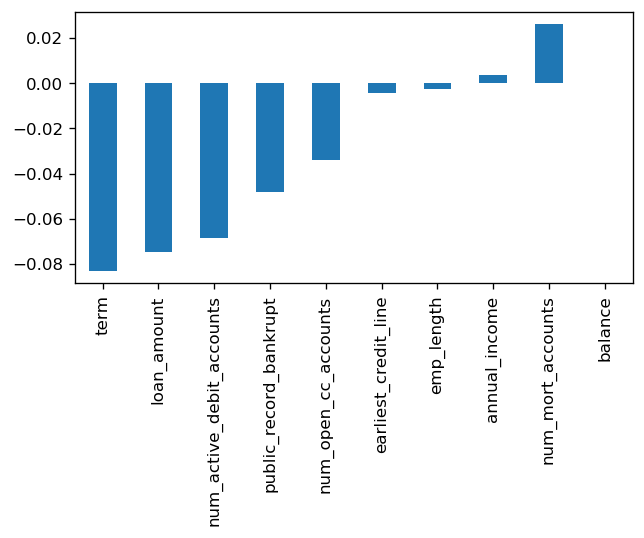

In [25]:
# copy so that it does not affect the original data frame
dataTemp = data.copy()
dataTemp['interest_rate'] = pd.get_dummies(dataTemp['interest_rate'], drop_first=True)


plt.figure(figsize=(6,3),dpi=120)
#Correlation with interest_rate for continuous features with loan_status feature dropped
dataTemp.corr()['interest_rate'].sort_values().drop('interest_rate').plot(kind='bar') 
plt.xticks(rotation=90); 

We can see that num_mort_accouonts is highly correlated with interest_rate compared to other features

In [26]:
#Analysis of 'state'

data['state'].value_counts()

CA    83
TX    49
NY    36
FL    33
MD    17
IL    16
MA    15
AZ    14
GA    12
PA    11
NC    10
WA    10
OR    10
NV    10
CO    10
AL     9
VA     9
OH     9
MI     9
SC     7
WI     7
TN     6
NJ     6
KS     5
NE     5
CT     5
MN     5
IN     4
KY     3
LA     3
MS     3
AK     3
HI     3
ID     2
AR     2
MO     2
ME     2
VT     2
UT     2
WV     1
WY     1
DC     1
OK     1
RI     1
Name: state, dtype: int64

In [27]:
#Using one_hot_encoding
add_state_dummies = pd.get_dummies(data['state'], drop_first=True) # drop_first will drop the first dummy column 
add_state_dummies

,AL,AR,AZ,CA,CO,CT,DC,FL,GA,HI,...,SC,TN,TX,UT,VA,VT,WA,WI,WV,WY
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9777,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9919,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9927,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data = pd.concat([data.drop('state', axis=1), add_state_dummies], axis=1)

In [29]:
#Analysis of 'annual_income'

data['annual_income'].describe()

count    4.540000e+02
mean     8.656195e+04
std      1.185115e+05
min      0.000000e+00
25%      4.844050e+04
50%      6.835000e+04
75%      9.852500e+04
max      2.300000e+06
Name: annual_income, dtype: float64

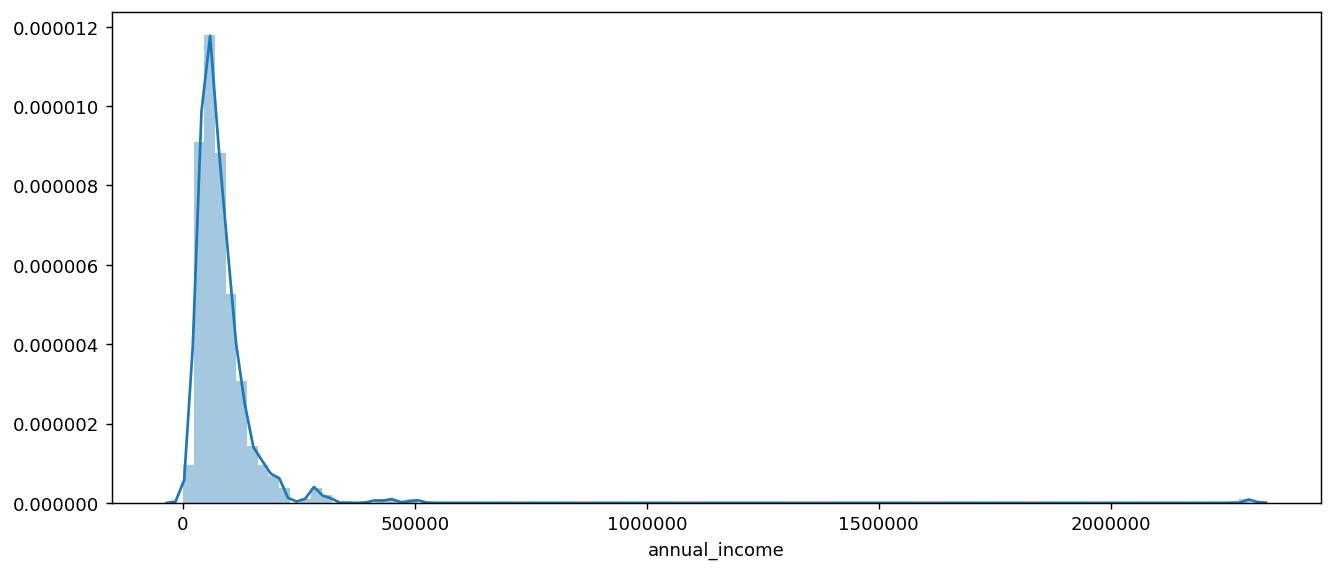

In [33]:
#PLotting distribution of annual_income
plt.figure(figsize=(12, 5), dpi=130)
sns.distplot(a=data['annual_income'], bins=100)